In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [33]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')

# Data Understanding

In [34]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [36]:
#we noticed that some columns almost empty, so we will remove them from the start
percent = train.isnull().sum().sort_values(ascending=False)/len(train)
percent[:8]

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
FireplaceQu    0.472603
LotFrontage    0.177397
GarageYrBlt    0.055479
dtype: float64

In [37]:
#drop features have 17% missing or more
drop_cols = list(percent[:7].index)
train.drop(drop_cols, axis=1, inplace=True)

In [38]:
drop_cols

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'MasVnrType',
 'FireplaceQu',
 'LotFrontage']

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyle    

<Axes: >

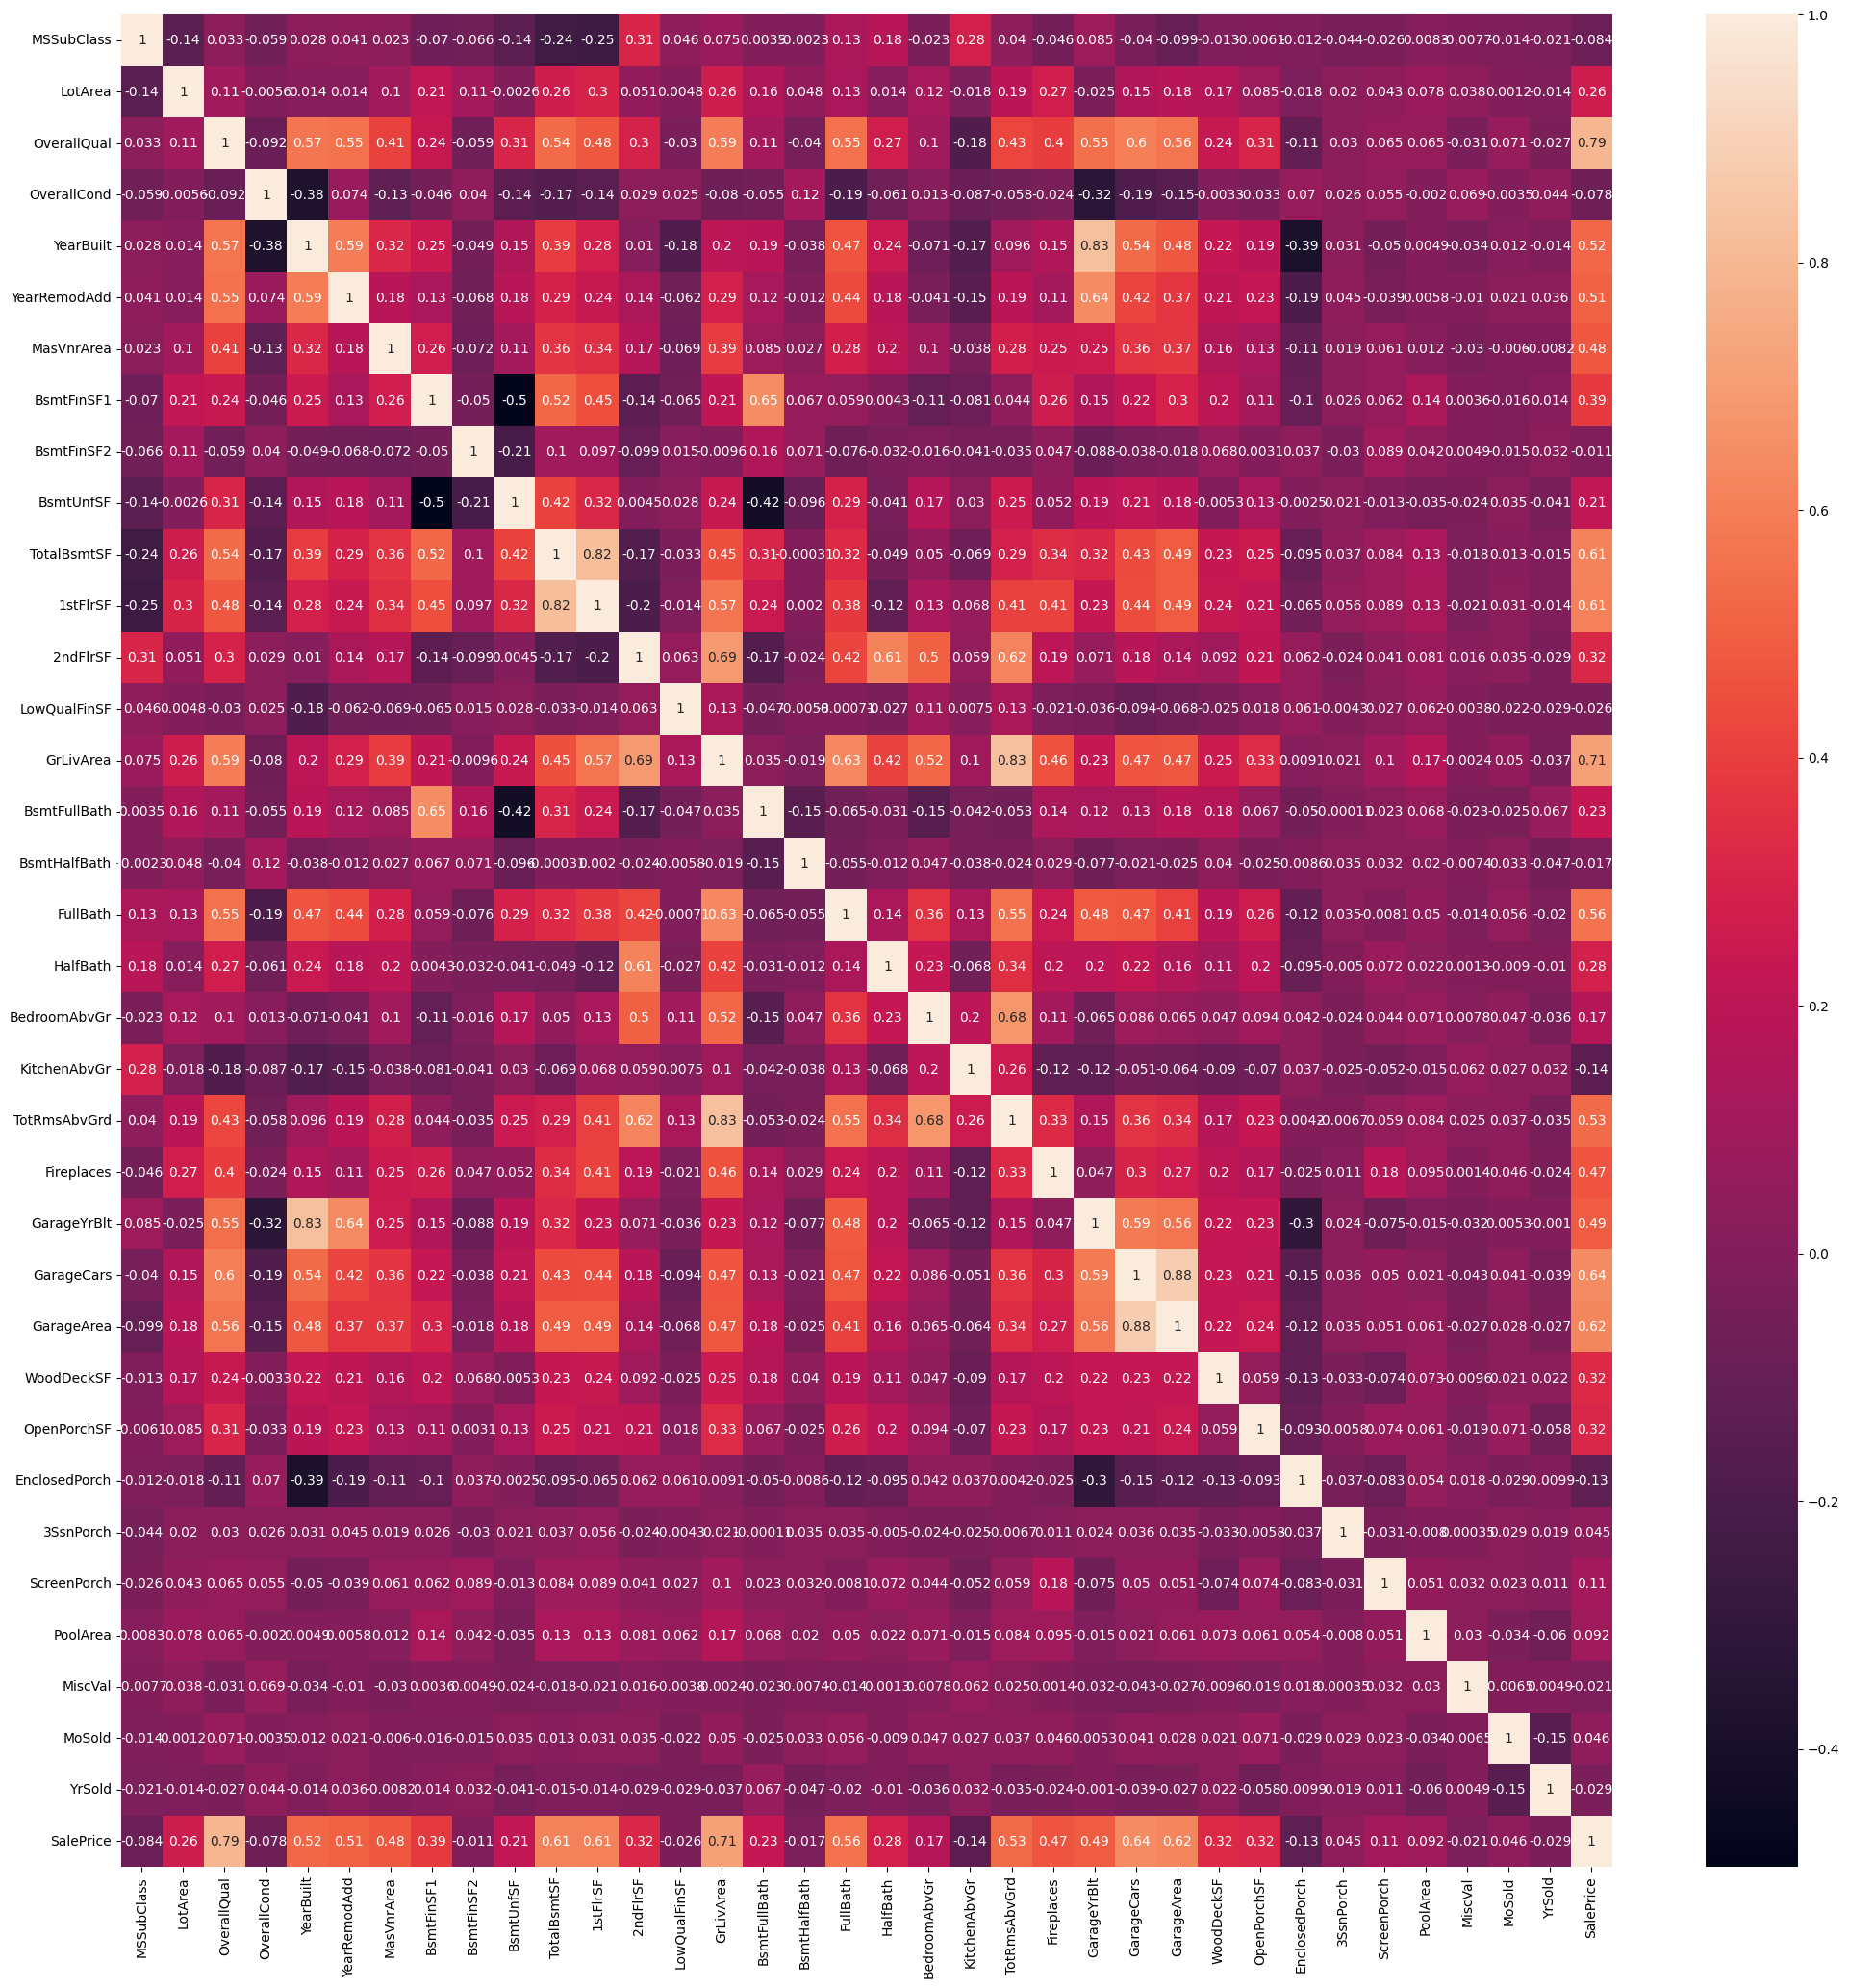

In [40]:
#pearson corr
num_cols = train.select_dtypes(include='number').columns
mat_corr = train[num_cols].corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
sns.heatmap(mat_corr, annot=True)

In [41]:
mat_corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [42]:
#the max number of features values are missing in rows are 10
train.isnull().sum(axis=1).sort_values(ascending=False)

Id
1219    10
706     10
534     10
1012    10
40      10
        ..
505      0
504      0
503      0
502      0
1460     0
Length: 1460, dtype: int64

In [43]:
#the max number of missing in column are 81
train.isnull().sum().sort_values(ascending=False)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
                ..
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
MSZoning         0
SalePrice        0
Length: 73, dtype: int64

# prepare the data for the model
we will use numeric missing using median and categorical with most frequent

In [44]:
num_data = train[num_cols]
num_data.isnull().sum().sort_values(ascending=False)

GarageYrBlt      81
MasVnrArea        8
MSSubClass        0
OpenPorchSF       0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
EnclosedPorch     0
BedroomAbvGr      0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
KitchenAbvGr      0
HalfBath          0
LotArea           0
BsmtUnfSF         0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtFinSF2        0
TotalBsmtSF       0
FullBath          0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
SalePrice         0
dtype: int64

In [45]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(num_data)
print(type(X))
num_data_tr = pd.DataFrame(X, columns=num_data.columns, index=num_data.index)

<class 'numpy.ndarray'>


In [46]:
imputer.statistics_

array([5.0000e+01, 9.4785e+03, 6.0000e+00, 5.0000e+00, 1.9730e+03,
       1.9940e+03, 0.0000e+00, 3.8350e+02, 0.0000e+00, 4.7750e+02,
       9.9150e+02, 1.0870e+03, 0.0000e+00, 0.0000e+00, 1.4640e+03,
       0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00,
       1.0000e+00, 6.0000e+00, 1.0000e+00, 1.9800e+03, 2.0000e+00,
       4.8000e+02, 0.0000e+00, 2.5000e+01, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00, 2.0080e+03,
       1.6300e+05])

In [47]:
cat_data = train.select_dtypes(include='object')
cat_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [48]:
cat_data.isnull().sum().sort_values(ascending=False)

GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
Electrical        1
HeatingQC         0
Heating           0
MSZoning          0
CentralAir        0
Functional        0
PavedDrive        0
SaleType          0
KitchenQual       0
Foundation        0
Street            0
ExterCond         0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
SaleCondition     0
dtype: int64

In [49]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy="most_frequent")
X = cat_imputer.fit_transform(cat_data)
cat_data_tr = pd.DataFrame(X, columns=cat_data.columns, index=cat_data.index)

In [50]:
cat_imputer.statistics_

array(['RL', 'Pave', 'Reg', 'Lvl', 'AllPub', 'Inside', 'Gtl', 'NAmes',
       'Norm', 'Norm', '1Fam', '1Story', 'Gable', 'CompShg', 'VinylSd',
       'VinylSd', 'TA', 'TA', 'PConc', 'TA', 'TA', 'No', 'Unf', 'Unf',
       'GasA', 'Ex', 'Y', 'SBrkr', 'TA', 'Typ', 'Attchd', 'Unf', 'TA',
       'TA', 'Y', 'WD', 'Normal'], dtype=object)

# after handling missing we need to Handling Text and Categorical Attributes

In [51]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
S = cat_encoder.fit_transform(cat_data_tr)#return sparce matrix
len(S.toarray()[0])

230

In [52]:
#column names after one hot encoding
encoded_columns = [x for lis in cat_encoder.categories_ for x in lis]
len(encoded_columns)

230

In [53]:
cat_data_tr_en = pd.DataFrame(S.toarray(), columns=encoded_columns,
                              index=cat_data_tr.index)
cat_data_tr_en

,C (all),FV,RH,RL,RM,Grvl,Pave,IR1,IR2,IR3,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
train_tr_en = pd.concat((num_data_tr, cat_data_tr_en), axis=1)
train_tr_en

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,70.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,60.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,953.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,20.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,589.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,70.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,877.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
len(train_tr_en.columns)

266

# Transformation Pipelines

In [56]:
num_attribs = list(train.select_dtypes(include='number').columns)
num_attribs.remove('SalePrice')
num_attribs

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [57]:
cat_attribs = list(train.select_dtypes(exclude='number').columns)
cat_attribs

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [132]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('std_scaler', OneHotEncoder(handle_unknown='ignore')),
    ])
transform_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])
data = train.drop('SalePrice', axis=1)
labels = train['SalePrice']
data_prepared = transform_pipeline.fit_transform(data)

In [79]:
len(data.columns)

72

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
tree_model = DecisionTreeRegressor()
scores = cross_val_score(tree_model, data_prepared, labels,
                        scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)



display_scores(tree_rmse_scores)

Scores: [38701.62766497 46710.15823772 34538.00784688 34482.70506882
 51418.30497078]
Mean: 41170.16075783192
Standard deviation: 6789.95144819147


In [60]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
scores = cross_val_score(lin_model, data_prepared, labels,
                        scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [28253.01989974 34082.75399892 37409.60649937 23942.12802866
 46508.50118124]
Mean: 34039.20192158471
Standard deviation: 7775.291009567477


In [61]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(forest_model, data_prepared, labels,
                        scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [26612.30589733 31840.0898757  30726.40929975 24311.49297858
 35653.00788405]
Mean: 29828.66118708453
Standard deviation: 3988.957204095398


In [63]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear')
scores = cross_val_score(svr_model, data_prepared, labels, scoring='neg_mean_squared_error' ,cv=5)
svr_rmse_scores = np.sqrt(-scores)
display_scores(svr_rmse_scores)

Scores: [70726.08541051 77075.89518199 83333.02556065 65876.48459171
 78138.19387074]
Mean: 75029.93692311956
Standard deviation: 6084.36216538869


In [67]:
from sklearn.neural_network import MLPRegressor
nn_model = MLPRegressor(hidden_layer_sizes=(10,5), max_iter=2000)
scores = cross_val_score(nn_model, data_prepared, labels, scoring='neg_mean_squared_error' ,cv=5)
nn_rmse_scores = np.sqrt(-scores)
display_scores(nn_rmse_scores)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Scores: [26694.67611971 33577.21480912 35692.00021434 25759.38277919
 45812.98120185]
Mean: 33507.251024844314
Standard deviation: 7247.753559986441


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [78]:
len(test.columns)

72

In [ ]:
test

In [81]:
#let's try our best model on test
#test.drop(drop_cols, axis=1, inplace=True)
test_prepared = transform_pipeline.transform(test)

In [82]:
forest_model.fit(data_prepared, labels)
y_hat = forest_model.predict(test_prepared)

In [83]:
y_hat

array([129427.08, 157896.  , 182808.19, ..., 153537.5 , 115719.83,
       224106.08])

In [84]:
sub = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sub['SalePrice'] = y_hat
sub.to_csv('submission.csv',index=False)

# Fine tune one or two models

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': [200, 250, 300],
        'max_features': randint(low=1, high=8),
    }
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(data_prepared, labels)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ee218acc4f0>,
                                        'n_estimators': [200, 250, 300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [96]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

32560.915609678857 {'max_features': 7, 'n_estimators': 200}
32478.743941699715 {'max_features': 7, 'n_estimators': 300}
33653.37207205971 {'max_features': 5, 'n_estimators': 200}
32407.13445780452 {'max_features': 7, 'n_estimators': 250}
35138.165495707966 {'max_features': 3, 'n_estimators': 300}


In [110]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=250, random_state=42)

In [108]:

feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([6.70115240e-03, 2.18604201e-02, 5.01051907e-02, 5.00970366e-03,
       2.60724238e-02, 2.19111523e-02, 1.98455838e-02, 2.96172972e-02,
       1.72469791e-03, 1.15711390e-02, 3.98702096e-02, 3.80445815e-02,
       2.50991794e-02, 6.78902912e-04, 4.82658204e-02, 5.61445343e-03,
       1.07861436e-03, 2.44092342e-02, 4.57807200e-03, 7.93157748e-03,
       1.08247548e-03, 2.47977737e-02, 1.56435640e-02, 2.58079986e-02,
       3.79067341e-02, 3.74227284e-02, 1.43266209e-02, 1.61806780e-02,
       2.24433114e-03, 3.64226583e-04, 2.80051947e-03, 1.44925635e-03,
       3.93083669e-04, 6.20053054e-03, 4.33388409e-03, 2.89345272e-04,
       8.28187526e-04, 1.26817670e-04, 2.88389524e-03, 3.40398491e-03,
       4.00048049e-05, 5.67256152e-05, 3.25172706e-03, 1.28144001e-03,
       5.92817927e-04, 4.18071279e-03, 9.92361608e-04, 1.25836975e-03,
       6.21166467e-04, 1.91159898e-03, 1.17263678e-05, 5.47461205e-07,
       1.71086228e-03, 1.42870160e-03, 2.81238546e-04, 3.68187645e-05,
      

In [109]:
cat_encoder = transform_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder['std_scaler'].categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.050105190730317925, 'OverallQual'),
 (0.04826582043536175, 'GrLivArea'),
 (0.03987020959450998, 'TotalBsmtSF'),
 (0.038044581530173205, '1stFlrSF'),
 (0.037906734142283016, 'GarageCars'),
 (0.037422728361569534, 'GarageArea'),
 (0.029617297223115967, 'BsmtFinSF1'),
 (0.026072423829125835, 'YearBuilt'),
 (0.025807998625683004, 'GarageYrBlt'),
 (0.02509917937796867, '2ndFlrSF'),
 (0.024797773656166592, 'TotRmsAbvGrd'),
 (0.0244092341658915, 'FullBath'),
 (0.021911152306124223, 'YearRemodAdd'),
 (0.02186042007796684, 'LotArea'),
 (0.019845583820100633, 'MasVnrArea'),
 (0.01618067802217332, 'OpenPorchSF'),
 (0.015643563977991798, 'Fireplaces'),
 (0.014326620874850093, 'WoodDeckSF'),
 (0.011571139025024837, 'BsmtUnfSF'),
 (0.007931577478846803, 'BedroomAbvGr'),
 (0.006701152395181546, 'MSSubClass'),
 (0.006200530541149187, 'MoSold'),
 (0.005614453429431814, 'BsmtFullBath'),
 (0.005009703657456899, 'OverallCond'),
 (0.004578071998820079, 'HalfBath'),
 (0.004333884094722626, 'YrSold'),
 (

In [104]:
cat_encoder['std_scaler']

OneHotEncoder(handle_unknown='ignore')

In [111]:
forest_model = RandomForestRegressor(n_estimators=500, random_state=42)
scores = cross_val_score(forest_model, data_prepared, labels,
                        scoring="neg_mean_squared_error", cv=3)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [25721.63984728 31666.94621811 32322.43561972]
Mean: 29903.673895034382
Standard deviation: 2969.2280895161593


In [113]:
forest_model.fit(data_prepared, labels)

RandomForestRegressor(n_estimators=500, random_state=42)

In [114]:
feature_importance = forest_model.feature_importances_
cat_encoder = transform_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder['std_scaler'].categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.5778315190603264, 'OverallQual'),
 (0.10939408155439524, 'GrLivArea'),
 (0.040371502266290875, 'TotalBsmtSF'),
 (0.03652896842389897, '2ndFlrSF'),
 (0.028353533311039243, 'BsmtFinSF1'),
 (0.022571366976369706, 'GarageCars'),
 (0.022100707511577743, '1stFlrSF'),
 (0.014594115712581446, 'GarageArea'),
 (0.013948474625329131, 'LotArea'),
 (0.009170243493355155, 'YearBuilt'),
 (0.006870630022806541, 'FullBath'),
 (0.006546303871168056, 'YearRemodAdd'),
 (0.006026691462034349, 'TotRmsAbvGrd'),
 (0.005386689290509319, 'BsmtUnfSF'),
 (0.0051349168710304845, 'OpenPorchSF'),
 (0.004868387983760831, 'MasVnrArea'),
 (0.004857061502519866, 'WoodDeckSF'),
 (0.004693684509911028, 'OverallCond'),
 (0.0046820277871840316, 'GarageYrBlt'),
 (0.003328248956063252, 'MoSold'),
 (0.002783900008278007, 'Fireplaces'),
 (0.0018517364603194437, 'BedroomAbvGr'),
 (0.0014994239187102092, 'MSSubClass'),
 (0.0014854974032468002, 'YrSold'),
 (0.0014171136955138848, 'RM'),
 (0.00123305714320025, 'ScreenPorch'),
 

# feature selection

In [117]:
f = sorted(zip(feature_importance, attributes), reverse=True)
selected = [x[1] for x in f]
selected[:9]

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'GarageCars',
 '1stFlrSF',
 'GarageArea',
 'LotArea']

In [127]:
important_features = selected[:9]
selected_data = train[important_features]
#data_prepared = transform_pipeline.transform(selected_data)
data_prepared = num_pipeline.fit_transform(selected_data)

In [128]:
forest_model.fit(data_prepared, labels)

RandomForestRegressor(n_estimators=500, random_state=42)

In [129]:
feature_importance = forest_model.feature_importances_
cat_encoder = transform_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder['std_scaler'].categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.5943150300123107, 'MSSubClass'),
 (0.13014197298491753, 'LotArea'),
 (0.0555340992420747, 'OverallQual'),
 (0.048552372308771324, 'OverallCond'),
 (0.048108243174556586, 'YearBuilt'),
 (0.03366917777884649, 'MasVnrArea'),
 (0.03046073541417272, 'BsmtFinSF2'),
 (0.030179284758848304, 'BsmtFinSF1'),
 (0.029039084325501736, 'YearRemodAdd')]

In [130]:
#it gives 0.16 error
selected_test = test[important_features]
test_prepared = num_pipeline.transform(selected_test)
y_hat = forest_model.predict(test_prepared)
sub = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sub['SalePrice'] = y_hat
sub.to_csv('submission.csv',index=False)

In [131]:
y_hat

array([129353.976, 162025.064, 173042.9  , ..., 164001.804, 106647.1  ,
       233306.296])

## fine tune NN

In [135]:
from sklearn.neural_network import MLPRegressor
nn_model = MLPRegressor(hidden_layer_sizes=(30,5), max_iter=3000)
scores = cross_val_score(nn_model, data_prepared, labels, scoring='neg_mean_squared_error' ,cv=5)
nn_rmse_scores = np.sqrt(-scores)
display_scores(nn_rmse_scores)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


Scores: [23270.45648621 32080.32649139 31376.26189266 23414.99711061
 44142.55622074]
Mean: 30856.919640323158
Standard deviation: 7631.660555503618


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [137]:
from sklearn.neural_network import MLPRegressor
nn_model = MLPRegressor(hidden_layer_sizes=(100,40,10))
scores = cross_val_score(nn_model, data_prepared, labels, scoring='neg_mean_squared_error' ,cv=5)
nn_rmse_scores = np.sqrt(-scores)
display_scores(nn_rmse_scores)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Scores: [27239.77635523 33698.33683099 33915.04251628 28237.96225531
 46410.3200717 ]
Mean: 33900.287605902726
Standard deviation: 6825.9248840664695


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [138]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
scores = cross_val_score(svr_model, data_prepared, labels, scoring='neg_mean_squared_error' ,cv=5)
svr_rmse_scores = np.sqrt(-scores)
display_scores(svr_rmse_scores)

Scores: [76919.05841232 83450.97387941 89430.92480347 71705.51904073
 84081.58500272]
Mean: 81117.61222772828
Standard deviation: 6157.210886301063


In [154]:
from sklearn.svm import SVR
svr_model = SVR(C=10000000, epsilon=0.5)
scores = cross_val_score(svr_model, data_prepared, labels, scoring='neg_mean_squared_error' ,cv=5)
svr_rmse_scores = np.sqrt(-scores)
display_scores(svr_rmse_scores)

Scores: [26552.90303858 31453.08599641 32400.63561991 21852.59027453
 40409.27362348]
Mean: 30533.697710580727
Standard deviation: 6213.9533974064925


In [160]:
from sklearn.svm import SVR
svr_model = SVR(kernel='poly',coef0=0.5,C=100000)
scores = cross_val_score(svr_model, data_prepared, labels, scoring='neg_mean_squared_error' ,cv=5)
svr_rmse_scores = np.sqrt(-scores)
display_scores(svr_rmse_scores)

Scores: [20058.63677254 50129.60635461 25854.03651532 19700.1012488
 25714.35610066]
Mean: 28291.347398386297
Standard deviation: 11234.571263559246


In [171]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear',coef0=0.9,C=10000)
scores = cross_val_score(svr_model, data_prepared, labels, scoring='neg_mean_squared_error' ,cv=5)
svr_rmse_scores = np.sqrt(-scores)
display_scores(svr_rmse_scores)

Scores: [21769.87407431 31513.54721352 28002.64215814 22049.44810399
 44149.31445995]
Mean: 29496.965201983396
Standard deviation: 8199.565736871633


In [176]:
#it gives 0.14 error

test_prepared = transform_pipeline.transform(test)
svr_model = SVR(kernel='linear',coef0=0.9,C=10000)
svr_model.fit(data_prepared, labels)
y_hat = svr_model.predict(test_prepared)
sub = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sub['SalePrice'] = y_hat
sub.to_csv('submission.csv',index=False)

In [177]:
y_hat

array([113465.13127864, 162958.76977308, 187832.65524939, ...,
       171321.66367869, 111265.25386351, 223149.32212922])

# End